In [1]:
import pandas as pd

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from collections import namedtuple

In [3]:
train_df = pd.read_csv("dataset/output/dataset_polimi_extended.csv")

In [4]:
selection = namedtuple("selection", ("conditions", "selected_columns", "group"))

# Plotting

If you have modified something or added some panels click "Cell > Run all below" from this cell

In [48]:
selections = []
i = 0

In [49]:
colors = ['blue','green','red','cyan','magenta','yellow','black']

In [50]:
# COPY ONE OF THIS PANEL TO ADD A LINE
# modify the conditions but be careful: to be compared two lines must have the same x (e.g: "zona")
selections.append(
    selection(
    conditions=( (train_df['giorno_della_settimana'] == 1) & 
                (train_df['categoria'] == 2)) # add your condition with "& <condition>"
    ,selected_columns = ['zona','vendite'] # select the columns you are interested in
    ,group = ['zona'] # select the group for which you want the mean
    ))
print("I will be "+colors[i])
i = i+1

I will be blue


In [51]:
# COPY ONE OF THIS PANEL TO ADD A LINE
# modify the conditions but be careful: to be compared two lines must have the same x (e.g: "zona")
selections.append(
    selection(
    conditions=( (train_df['giorno_della_settimana'] == 1) & 
                (train_df['categoria'] == 1)) # add your condition with "& <condition>"
    ,selected_columns = ['zona','vendite'] # select the columns you are interested in
    ,group = ['zona'] # select the group for which you want the mean
    ))
print("I will be "+colors[i])
i = i+1

green


In [52]:
selected_dfs = [train_df[sel.conditions][sel.selected_columns].groupby(sel.group).mean()
               for sel in selections]
selected_couples = [(df.index.values, df['vendite'], colors[i]) for (i,df) in enumerate(selected_dfs)]
plot_list = [element for tupl in selected_couples for element in tupl]

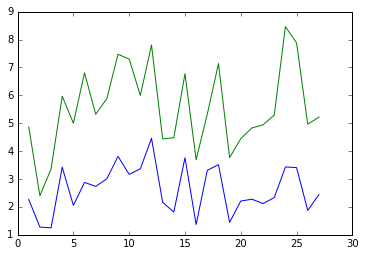

In [53]:
plt.plot(*plot_list)
plt.show()

# Coorrelazione giorni festivi - vendite
Giorni in cui festivo = 1 e vendite <= 2 / giorni in cui festivo era 1

In [20]:
# Tutto il dataset
df1 = train_df
len(df1[(df1.festivo == 1) & (df1.vendite <= 1)])/len(df1[(df1.festivo == 1)])

0.7796494217265593

In [14]:
# 2014
df2 = df1[(df1.anno == 2014)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8987573099415205

In [18]:
# 2015
df2 = df1[(df1.anno == 2015)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8926113613613613

In [15]:
# 2016
df2 = df1[(df1.anno == 2016)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8976483585858586

In [19]:
# Tutto meno il 2014
df2 = df1[(df1.anno != 2014)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8940412186379928